In [3]:
import pandas as pd # data manipulation
import time  # for fitting times

# importing clean dataset from previous assignment
df = pd.read_csv('clean.csv', index_col = 'Unnamed: 0')

In [4]:
# binarizing target to fit the models
def binarize_target(value):
    if value == '>50K':
        return 1
    else:
        return -1

df.income = df.income.apply(binarize_target)

# Testing Models

In [5]:
# single models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # SVM in sklearn for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso

# ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# tuning resources
from sklearn.model_selection import GridSearchCV, cross_val_score

In [6]:
# for building a comparison table between models
models = {'model' : [],
          'fitting_time' : [],
          'accuracy' : []
        }

In [7]:
X = df.drop('income', axis = 1)
y = df.income

#### KNN Model

Firstly, let's review how the KNN's performance is. From the last assignment we've already found its best hyperparameters:

In [8]:
knn = KNeighborsClassifier(33)
scores = cross_val_score(knn, X, y, cv = 5)

models['accuracy'].append(scores.max())
models['model'].append('KNN(33)')

In [9]:
knn = KNeighborsClassifier(33)

start = time.time()
knn.fit(X, y)
finish = time.time()
delta = finish - start

models['fitting_time'].append(delta)

#### Hyperparameters List

In [12]:
# list of hyperparameters for tuning each model

tree_params = {
    'criterion' : ['entropy'],
    'max_depth' : [60, 90, 130, 200, 300, None]
}

logi_params = {
    'penalty' : ['l2', None],
    'C' : [0.05, 0.1, 0.25, 0.5, 0.6, 0.75]
}

fore_params = {
    'n_estimators' : [20, 100, 250],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 60, 100]
}

svc_params = {
    'C' : [0.6, 0.8, 1],
    'kernel' : ['linear', 'poly'],
    'degree' : [3, 4, 5]
}

boost_params = {
    'n_estimators' : [50, 80, 100, 200],
    'learning_rate' : [0.1, 0.2, 0.3, 0.5],
    'criterion' : ['friedman_mse', 'squared_error']
}

We're going to follow the order:
1. select the best hyperparameters for each model through grid search.
2. compute the best score of the model.
3. use the hyperparameters found to compute its fitting time.

#### Decision Tree

In [13]:
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, param_grid = tree_params, cv = 5, scoring = 'accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [60, 90, 130, 200, 300, None]},
             scoring='accuracy')

In [14]:
# getting the hyperparameters and best score
models['model'].append('decision tree')
models['accuracy'].append(grid.best_score_)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 300}

In [15]:
#getting the fitting time
tree = DecisionTreeClassifier(criterion = 'entropy')

start = time.time()
tree.fit(X, y)
finish = time.time()
delta = finish - start

models['fitting_time'].append(delta)

#### Logistic Regression

In [16]:
loreg = LogisticRegression()
grid = GridSearchCV(loreg, param_grid = logi_params, cv = 5, scoring = 'accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 0.25, 0.5, 0.6, 0.75],
                         'penalty': ['l2', None]},
             scoring='accuracy')

In [17]:
# getting the hyperparameters and best score
models['model'].append('logistic regression')
models['accuracy'].append(grid.best_score_)
grid.best_params_

{'C': 0.05, 'penalty': None}

In [ ]:
#getting the fitting time
loreg = LogisticRegression(C = 0.5, penalty = None)

start = time.time()
loreg.fit(X, y)
finish = time.time()
delta = finish - start

models['fitting_time'].append(delta)

#### SVM - Support Vector Machine

In [20]:
svm = SVC()
grid = GridSearchCV(svm, param_grid = svc_params, cv = 5, scoring = 'accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.6, 0.8, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly']},
             scoring='accuracy')

In [21]:
# getting the hyperparameters and best score
models['model'].append('SVM')
models['accuracy'].append(grid.best_score_)
grid.best_params_

{'C': 1, 'degree': 3, 'kernel': 'linear'}

In [22]:
#getting the fitting time
svm = SVC(C = 0.6, degree = 3, kernel = 'linear')

start = time.time()
svm.fit(X, y)
finish = time.time()
delta = finish - start

models['fitting_time'].append(delta)

#### Random Forest

In [23]:
forest = RandomForestClassifier(class_weight = 'balanced')

grid = GridSearchCV(forest, param_grid = fore_params, cv = 3, scoring = 'accuracy', verbose = 1)
grid.fit(X, y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 60, 100],
                         'n_estimators': [20, 100, 250]},
             scoring='accuracy', verbose=1)

In [24]:
# getting the hyperparameters and best score
models['model'].append('random forest')
models['accuracy'].append(grid.best_score_)
grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 250}

In [25]:
#getting the fitting time
forest = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy')

start = time.time()
forest.fit(X, y)
finish = time.time()
delta = finish - start

models['fitting_time'].append(delta)

#### Gradient Boosting

In [26]:
boost = GradientBoostingClassifier()
grid = GridSearchCV(boost, param_grid = boost_params, cv = 5, scoring = 'accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5],
                         'n_estimators': [50, 80, 100, 200]},
             scoring='accuracy')

In [27]:
# getting the hyperparameters and best score
models['model'].append('Gradient Boosting')
models['accuracy'].append(grid.best_score_)
grid.best_params_

{'criterion': 'squared_error', 'learning_rate': 0.2, 'n_estimators': 200}

In [30]:
#getting the fitting time
boost = GradientBoostingClassifier(criterion = 'squared_error', learning_rate = 0.2, n_estimators = 200)

start = time.time()
boost.fit(X, y)
finish = time.time()
delta = finish - start

models['fitting_time'].append(delta)

#### Comparison Table

In [35]:
pd.DataFrame(models)

,model,fitting_time,accuracy
0,KNN(33),0.015448,0.837070
1,decision tree,0.268803,0.817690
2,logistic regression,0.856848,0.849539
3,SVM,51.767650,0.848372
4,random forest,6.000674,0.841492
5,Gradient Boosting,10.471410,0.871591


From the information gathered through cross validation above, we can conclude:<br>
- Ensemble models, in general, have a higher performance when compared to single base models. We can see that the model with most accuracy is the gradient boosting, with an 87% rate.
- However, ensemble models, when compared to most base learners, have a longer fitting time. This illustrates the higher computational power these models require.

Finally, if we are leaning towards high performance while having a reasonable fitting time, gradient boosting is the best choice. On the other hand, if computational power is a filtering factor, one might consider choosing logistic regression - which requires 10x less time for fitting than gradient boosting while being the most accurate base learner.

### Computing other metrics on the best models

This section covers the confusion matrices, precision, recall and f1-score for the two best models above.

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)

##### Gradient Boosting

Precision: 0.7689950980392157
Recall: 0.6432598667350077
F1 Score: 0.7005302818866871


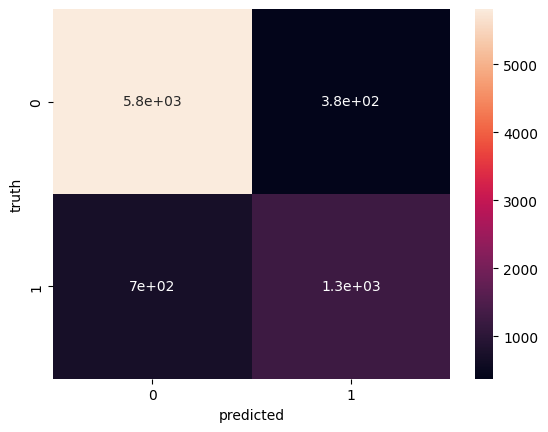

In [41]:
y_pred = boost.predict(X_test)

p = precision_score(y_test, y_pred)
print(f'Precision: {p}')

r = recall_score(y_test, y_pred)
print(f'Recall: {r}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

We can see that the model has low incorrect predictions. It's precision and recall are high, which leads to high f1-score as well.

##### Logistic Regression

Precision: 0.7211895910780669
Recall: 0.5966171194259354
F1 Score: 0.653015427769986


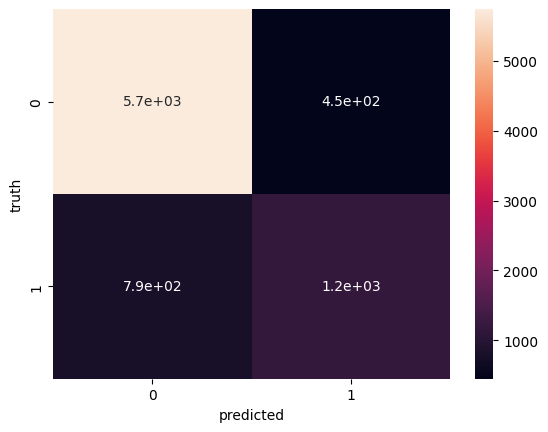

In [43]:
y_pred = loreg.predict(X_test)

p = precision_score(y_test, y_pred)
print(f'Precision: {p}')

r = recall_score(y_test, y_pred)
print(f'Recall: {r}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

Compared to gradient boosting, its metrics are all lower, specially the recall. However, it's still a great performance for a single model.